In [1]:
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd
import common
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y,  f_true = common.generate_observed_dataset()
print(X.shape)
print(y.shape)
print(f_true.shape)

(100, 1)
(100,)
(100,)


(100, 1)
(100,)


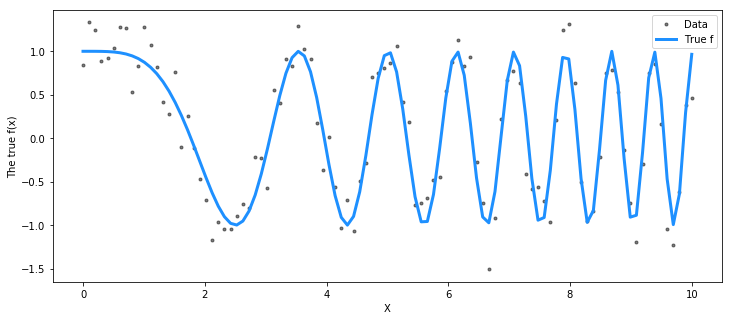

In [3]:
print(X.shape)
print(y.shape)
## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); 
ax = fig.gca()
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); 
plt.legend();

In [4]:
with pm.Model() as model:
    ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)
    # y_は使われてない。このメソッドは何をしているのか？

    mp = pm.find_MAP()

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -71.133, ||grad|| = 0.042228: 100%|██████████| 25/25 [00:00<00:00, 329.29it/s]  


In [5]:
# new values from x=0 to x=20
X_new = np.linspace(0, 20, 600)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

In [6]:
# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_posterior_predictive([mp], vars=[f_pred], samples=2000)

100%|██████████| 2000/2000 [04:52<00:00,  6.84it/s]


In [6]:
print(pred_samples["f_pred"].shape)
print(X_new.shape)


(2000, 600)
(600, 1)


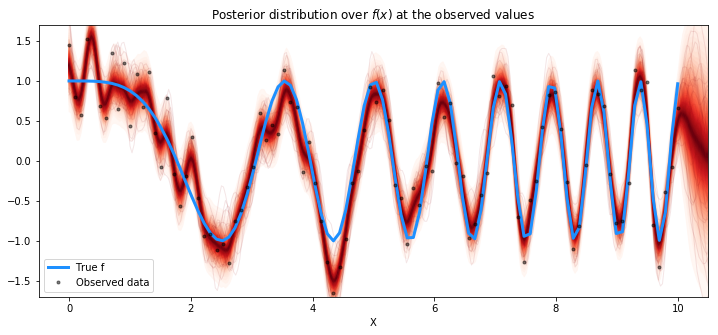

In [7]:
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); 
plt.xlim([-0.5,10.5]);
plt.ylim(-1.7, 1.7)
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();

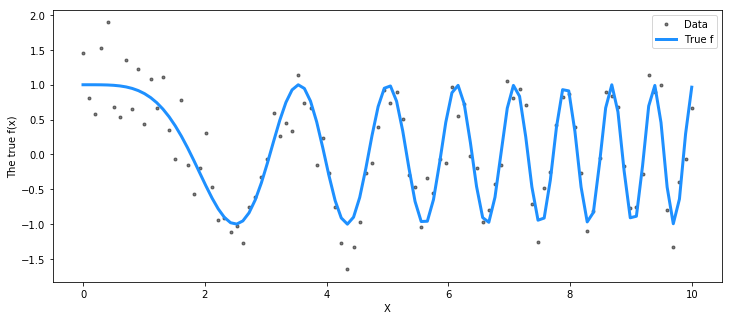

In [8]:
## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); 
ax = fig.gca()
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); 
plt.legend();

In [7]:
with model:
    y_pred = gp.conditional("y_pred", X_new, pred_noise=True)
    y_samples = pm.sample_posterior_predictive([mp], vars=[y_pred], samples=2000)

100%|██████████| 2000/2000 [04:47<00:00,  6.96it/s]


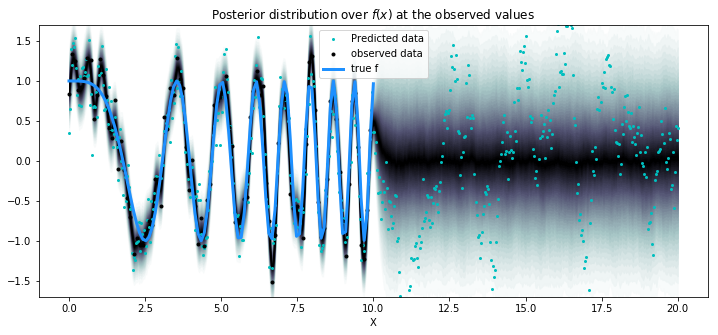

In [22]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, y_samples["y_pred"], X_new, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_pred"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); 
# plt.ylim([-13,13]);
# plt.title("posterior predictive distribution, y_*"); plt.legend();

# axis labels and title
plt.xlabel("X"); 
# plt.xlim([-0.5,10.5]);
plt.ylim(-1.7, 1.7)
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();
plt.legend(loc="best")


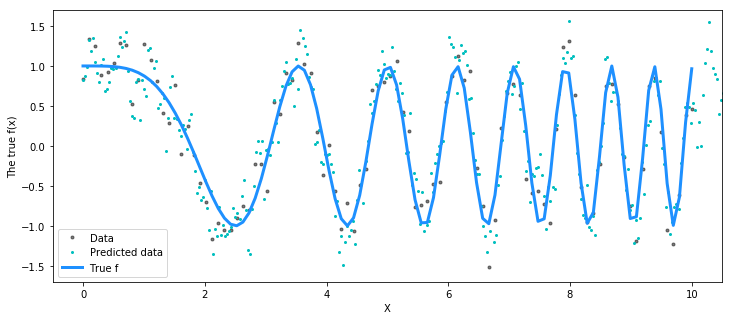

In [15]:
## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); 
ax = fig.gca()
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
plt.plot(X_new, y_samples["y_pred"][0, :].T, "co", ms=2, label="Predicted data");
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); 
plt.xlim([-0.5,10.5]);
plt.ylim(-1.7, 1.7)
plt.legend(loc="best");

In [16]:
y_samples["y_pred"].shape

(2000, 600)

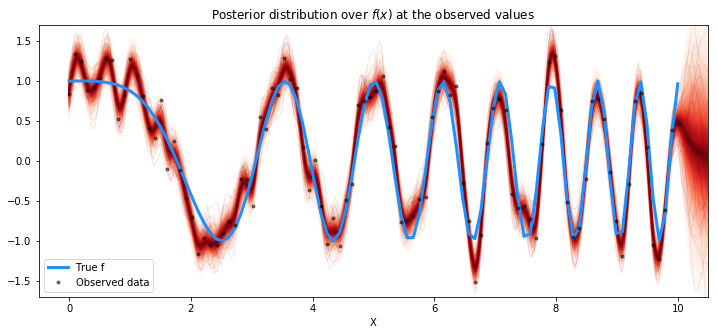

In [17]:
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); 
plt.xlim([-0.5,10.5]);
plt.ylim(-1.7, 1.7)
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();

(-1.7, 1.7)

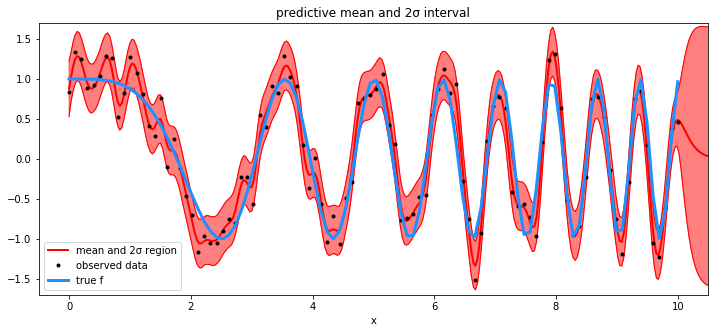

In [24]:
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)

# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();
plt.xlim([-0.5,10.5]);
plt.ylim(-1.7, 1.7)

ベイズ推定してない。MAPしてる。